In [12]:
from causal_ccm import ccm
import os
import scipy
import mat73

In [13]:
cd PFCInformationFlowData


[Errno 2] No such file or directory: 'PFCInformationFlowData/Neur'
/home/luke/CCM/PFCInformationFlowData/Neurophysiology


In [14]:
cd Neurophysiology

[Errno 2] No such file or directory: 'Neurophysiology'
/home/luke/CCM/PFCInformationFlowData/Neurophysiology


In [15]:
data = []
# assign directory
directory = cwd = os.getcwd()
 
# iterate over files in
# that directory

import numpy as np
from scipy.io import loadmat  # this is the SciPy module that loads mat-files
import matplotlib.pyplot as plt
from datetime import datetime, date, time
import pandas as pd

#mat = loadmat('measured_data.mat')  # load mat-file
#mdata = mat['measuredData']

files = [f for f in os.listdir('.') if os.path.isfile(f)]

for f in files:
    try :
        data.append(loadmat(f))
    except :
        data.append(mat73.loadmat(f))

In [16]:
data

[{'Bin': {'cen': array([-2000., -1980., -1960., -1940., -1920., -1900., -1880., -1860.,
          -1840., -1820., -1800., -1780., -1760., -1740., -1720., -1700.,
          -1680., -1660., -1640., -1620., -1600., -1580., -1560., -1540.,
          -1520., -1500., -1480., -1460., -1440., -1420., -1400., -1380.,
          -1360., -1340., -1320., -1300., -1280., -1260., -1240., -1220.,
          -1200., -1180., -1160., -1140., -1120., -1100., -1080., -1060.,
          -1040., -1020., -1000.,  -980.,  -960.,  -940.,  -920.,  -900.,
           -880.,  -860.,  -840.,  -820.,  -800.,  -780.,  -760.,  -740.,
           -720.,  -700.,  -680.,  -660.,  -640.,  -620.,  -600.,  -580.,
           -560.,  -540.,  -520.,  -500.,  -480.,  -460.,  -440.,  -420.,
           -400.,  -380.,  -360.,  -340.,  -320.,  -300.,  -280.,  -260.,
           -240.,  -220.,  -200.,  -180.,  -160.,  -140.,  -120.,  -100.,
            -80.,   -60.,   -40.,   -20.,     0.,    20.,    40.,    60.,
             80.,   100.

EmbedDimension( dataFrame = sampleData["TentMap"], lib = "1 100", pred = "201 500", columns = "TentMap", target = "TentMap") 



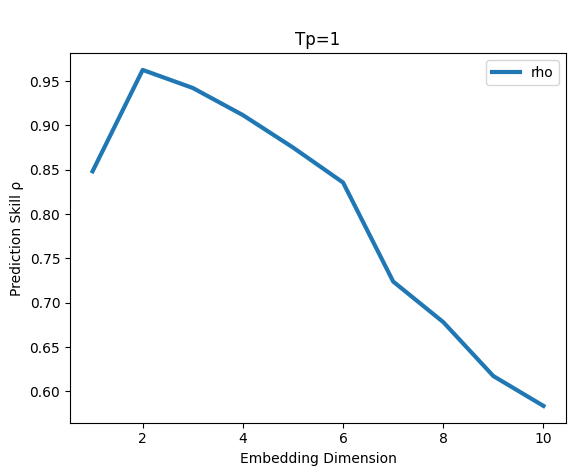

PredictInterval( dataFrame = sampleData["TentMap"], lib = "1 100", pred = "201 500", E = 2, columns = "TentMap", target = "TentMap") 



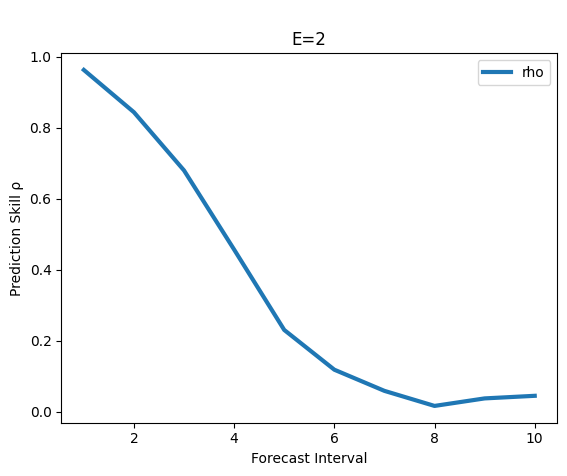

PredictNonlinear( dataFrame = sampleData["TentMapNoise"], lib = "1 100", pred = "201 500", E = 2, columns = "TentMap", target = "TentMap" ) 



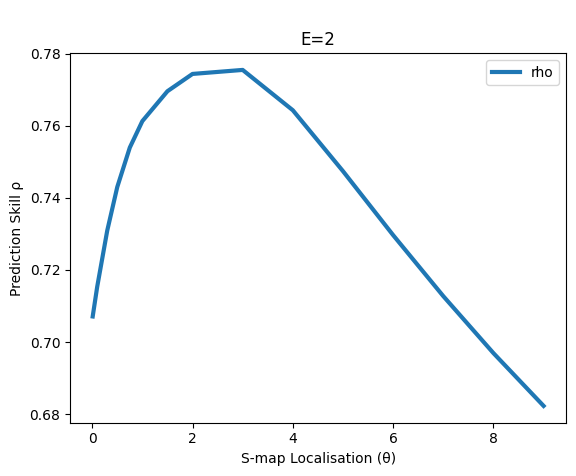

Simplex( dataFrame = sampleData["block_3sp"], lib = "1 99", pred = "100 195",  E = 3, embedded = True, showPlot = True, const_pred = True, columns="x_t y_t z_t", target="x_t") 



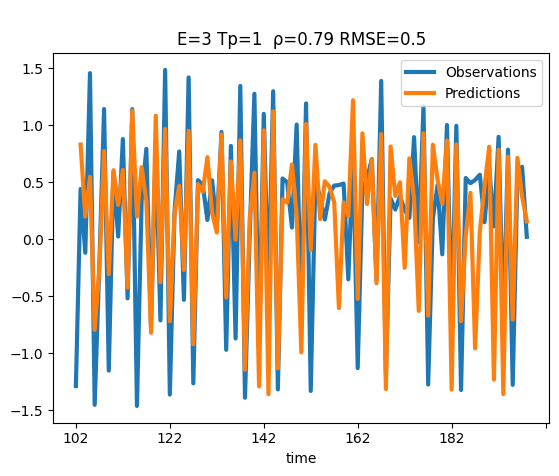

Simplex( dataFrame = sampleData["block_3sp"], lib = "1 99", pred = "105 190",  E = 3, showPlot = True, const_pred = True, columns = "x_t", target = "x_t") 



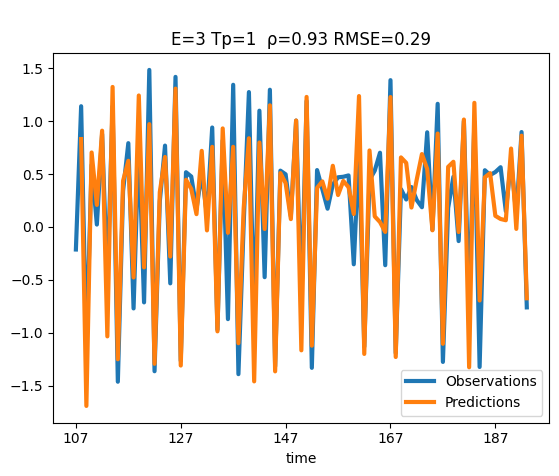

Multiview( dataFrame = sampleData["block_3sp"], lib = "1 99", pred = "105 190",  E = 3, columns = "x_t y_t z_t", target = "x_t", showPlot = True) 

Multiview() Set view sample size to 9


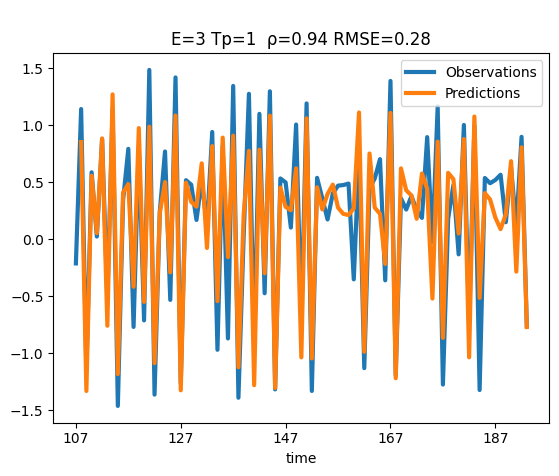

SMap( dataFrame = sampleData["circle"], lib = "1 100", pred = "110 190", theta = 4, E = 2, verbose = False, showPlot = True, embedded = True, columns = "x y", target = "x") 



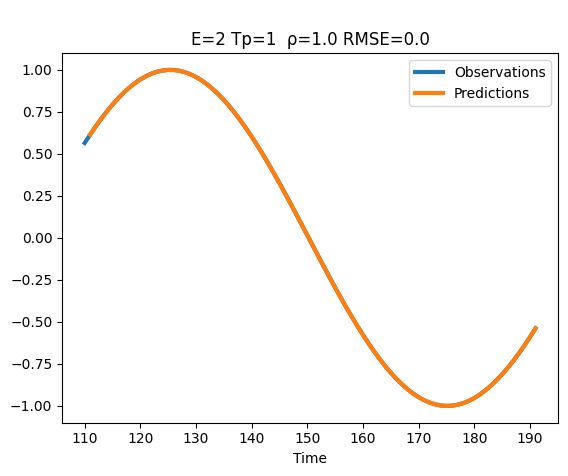

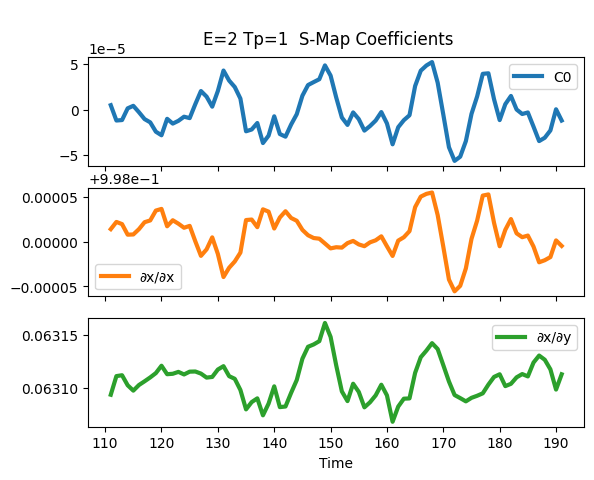

CCM( dataFrame = sampleData["sardine_anchovy_sst"], E = 3, Tp = 0, columns = "anchovy", target = "np_sst", libSizes = "10 70 10", sample = 100, verbose = False,  showPlot = True) 



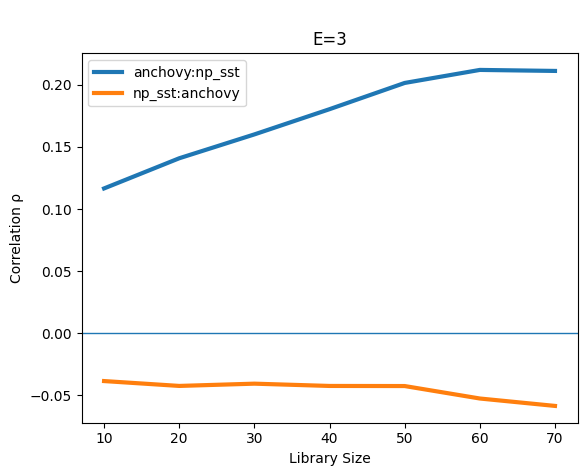

In [18]:
import pyEDM

pyEDM.Examples()

In [20]:

from pyEDM import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


      time         x         y
0        0  0.100000  0.100000
1        1  0.337000  0.338069
2        2  0.827642  0.841567
3        3  0.465699  0.514600
4        4  0.909081  0.940958
...    ...       ...       ...
996    996  0.248481  0.602457
997    997  0.685480  0.901648
998    998  0.746995  0.345375
999    999  0.681963  0.851080
1000  1000  0.754064  0.486196

[1001 rows x 3 columns]


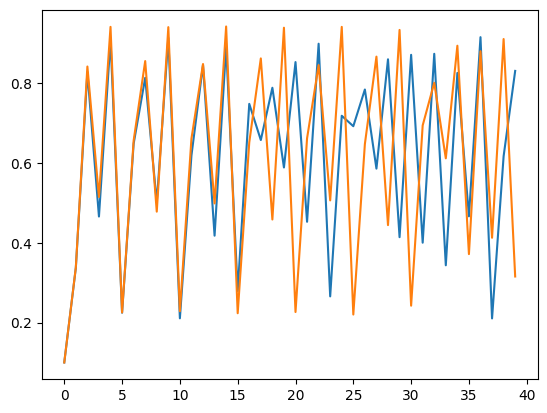

In [21]:
def x_upd(x, y, rx=3.75, axy=-0.1, sigma_x = 1e-3):
    return rx*x*(1-x) + axy*x*y + sigma_x*np.random.randn()

def y_upd(x, y, r=3.75, ayx=0.02, sigma_y = 1e-3):
    return r*y*(1-y) + ayx*x*y + sigma_y*np.random.randn()

def simulate(x0, y0, steps=1000):
    x_hist = []
    y_hist = []
    time_hist = []
    x_hist.append(x0)
    y_hist.append(y0)
    time_hist.append(0)
    x = x0
    y = y0
    t = 0
    for i in range(steps):
        x_new, y_new = x_upd(x, y), y_upd(x, y) 
        x = x_new
        y = y_new 
        x_hist.append(x)
        y_hist.append(y)
        t += 1
        time_hist.append(t)
    data = pd.DataFrame({'time': time_hist, 
                         'x': x_hist, 
                         'y': y_hist})
    return data

mydata = simulate(0.1, 0.1)
plt.figure()
plt.plot(mydata['x'][:40])
plt.plot(mydata['y'][:40]);
print(mydata)

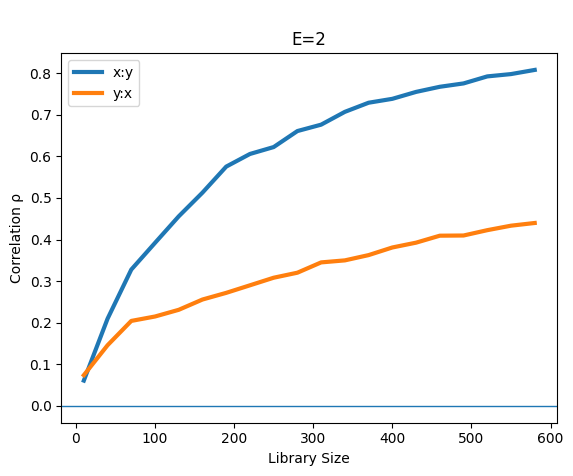

In [22]:
CCM( dataFrame = mydata, E = 2, 
     columns = 'x', target = 'y',
     libSizes = "10 600 30", sample = 20, showPlot = True );

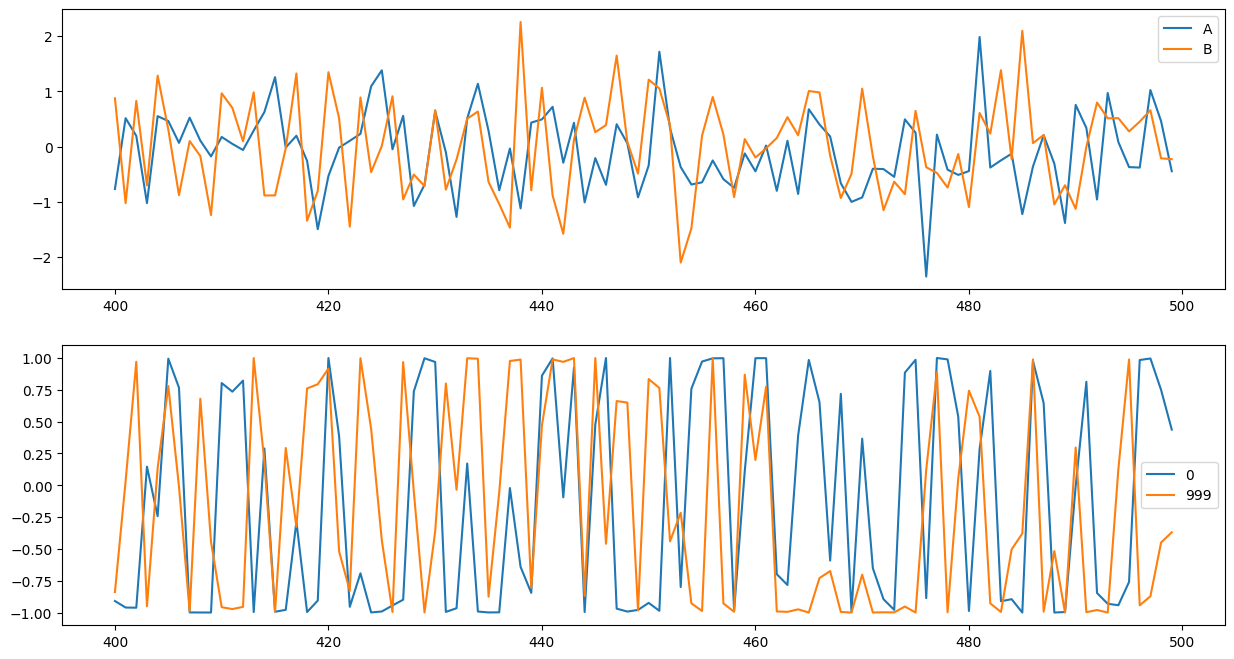

In [29]:
def update(x, a, J):
    return np.tanh(a*J@x)

def get_pop_act(x):
    Npop = int( len(x)/2 )
    A = np.sum(x[:Npop])/np.sqrt(Npop)
    B = np.sum(x[Npop:])/np.sqrt(Npop)
    return A, B

def simulate(a=1, sigma=1, p=1, pM=1, sigmaM=0.3, b = 0.0, sigma0=0.1, N=1000, steps=500, modules=True):
    J  = sigma*np.random.randn( N,N )/np.sqrt(p*N)
    J  = J*( np.random.rand( N, N) <= p )
    if modules:
        k = int(N/2)
        J *= np.sqrt(2)
        J[k:N, :k] = (np.random.rand(k,k) <= pM )*( sigmaM*np.random.randn(k,k)/np.sqrt(pM*k) + b/(pM*k) )
        J[:k, k:N] = 0 
        A_hist = []
        B_hist = []

    x0 = sigma0*np.random.randn( N )
    t = 0
    x = x0
    A, B = get_pop_act(x0)

    x_hist = []
    time_hist = []
    x_hist.append(np.copy(x0))
    A_hist.append(A)
    B_hist.append(B)
    time_hist.append(t)

    for i in range(steps):
        x = update(x, a, J) 
        A, B = get_pop_act(x)
        x_hist.append(np.copy(x))
        A_hist.append(A)
        B_hist.append(B)
        
        t += 1
        time_hist.append(t)

    data_time = pd.DataFrame({'time': time_hist} ) 
    data_neurons = pd.DataFrame(x_hist)
    data_A = pd.DataFrame({'A': A_hist} )
    data_B = pd.DataFrame({'B': B_hist} )
    
    data = pd.concat( [data_time, data_neurons, data_A, data_B], axis=1, join='inner')
    data.columns = data.columns.astype(str)
    return data, J

N = 1000
n0 = N-1

dataNN, J = simulate(sigma=3, N = N, sigmaM=.2, b=.1)

Tstart = 400
Tstop = 500

fig, axs = plt.subplots(2,1, figsize=(15,8) )
axs[0].plot(dataNN['time'][Tstart:Tstop], dataNN['A'][Tstart:Tstop], label='A')
axs[0].plot(dataNN['time'][Tstart:Tstop], dataNN['B'][Tstart:Tstop], label='B')
axs[0].legend()
axs[1].plot(dataNN['time'][Tstart:Tstop], dataNN['0'][Tstart:Tstop], label='0')
axs[1].plot(dataNN['time'][Tstart:Tstop], dataNN[str(n0)][Tstart:Tstop], label=str(n0))
axs[1].legend();

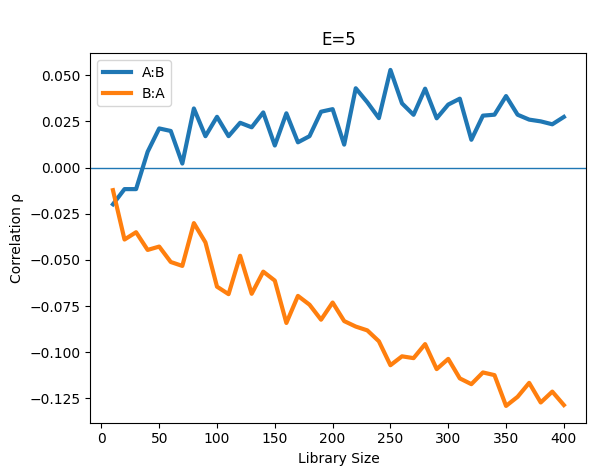

In [30]:
CCM( dataFrame = dataNN, E = 5, 
     columns = 'A', target = 'B',
     libSizes = "10 400 10", sample = 20, showPlot = True );

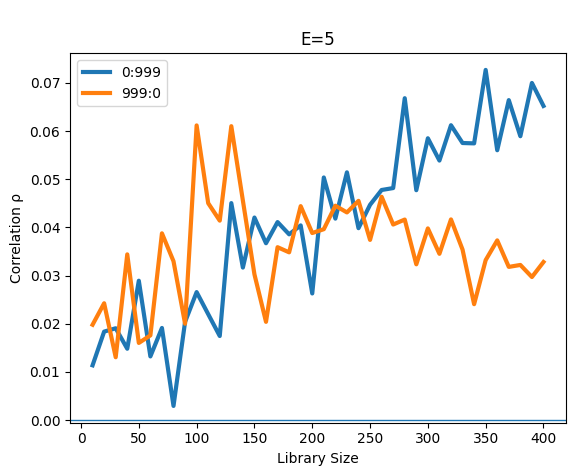

Js are 0 --> 999: 0.017 and 999 --> 0: 0.000


In [31]:
pre = 0
post = n0 #int(N/2+1)

CCM( dataFrame = dataNN, E = 5, 
     columns = str(pre), target = str(post),
     libSizes = "10 400 10", sample = 20, showPlot = True );

print(f"Js are {pre} --> {post}: {J[post,pre]:.3f} and {post} --> {pre}: {J[pre,post]:.3f}")

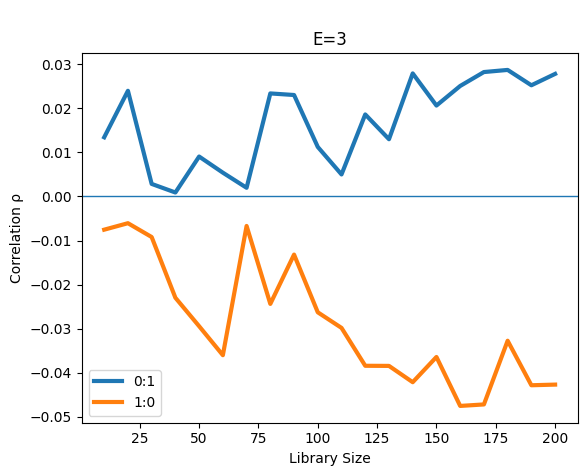

Js are 0 --> 1: 0.068 and 1 --> 0: -0.021


In [32]:
pre = 0
post = 1

CCM( dataFrame = dataNN, E = 3, 
     columns = str(pre), target = str(post),
     libSizes = "10 200 10", sample = 20, showPlot = True );

print(f"Js are {pre} --> {post}: {J[post,pre]:.3f} and {post} --> {pre}: {J[pre,post]:.3f}")

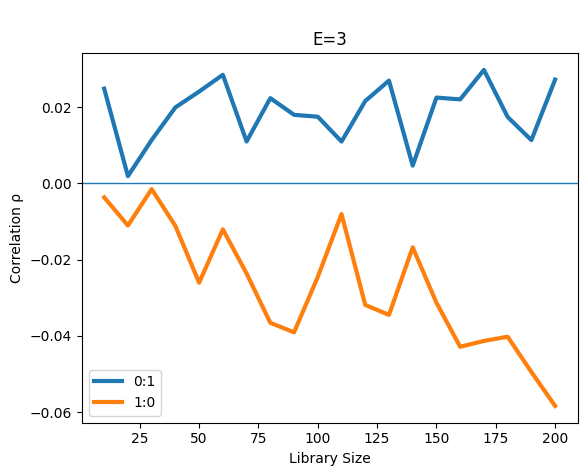

Js are 0 --> 1: 0.068 and 1 --> 0: -0.021


In [33]:
pre = 0
post = 1

CCM( dataFrame = dataNN, E = 3, 
     columns = str(pre), target = str(post),
     libSizes = "10 200 10", sample = 20, showPlot = True );

print(f"Js are {pre} --> {post}: {J[post,pre]:.3f} and {post} --> {pre}: {J[pre,post]:.3f}")